In [175]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [176]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [177]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [178]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [179]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [180]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [181]:
store.close()
store_repeat.close()

In [182]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [183]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='immortalized cell line'")['biosample_term_name'].unique()

array(['T47D', 'Daoy', 'HL-60', 'A549', 'RPMI8226', 'K562', 'HeLa-S3',
       'Jurkat', 'Caki2', 'KBM-7', 'Karpas-422', 'GM06990', 'NCI-H226',
       'GM12878', 'HCT116', 'MG63', 'HS-27A', 'HS-5', 'BE2C', 'WI38',
       'HepG2', 'M059J', 'WERI-Rb-1', 'MCF-7', 'LHCN-M2',
       'LNCaP clone FGC', 'PC-9', 'RCC 7860', 'DND-41', 'MM.1S', 'GM12864',
       'CMK', 'GM12865', 'OCI-LY7', 'HT-29', 'Panc1', 'A673', 'SK-N-SH',
       'G401', 'ACHN', 'Loucy', 'SK-N-MC', 'NAMALWA', 'SJSA1', 'NT2/D1',
       'RPMI-7951', 'PC-3', 'NB4', 'Caco-2', 'A172'], dtype=object)

In [184]:
encode_metadata.query("assembly == 'hg19' & biosample_term_name == 'K562' & method=='H3K27ac'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
170,ENCSR903CEC,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for K562,[],3,"August, 2016",[],/organisms/human/,[],ENCFF250DSF.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
204,ENCSR219XCK,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for L...,[],3,"August, 2016",[],/organisms/human/,[],ENCFF371JNQ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac


In [185]:
encode_bed = BedTool("../download/ENCODE/ENCSR903CEC/files/ENCFF250DSF/ENCFF250DSF.bed.gz")

In [186]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_MIR_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [187]:
encode_bed.head()

chr7	106206757	106212313	Distal-Prediction-1	1	.	106207512	106212313	255,205,0
 chr2	33141168	33141802	Distal-Prediction-2	1	.	33141168	33141802	255,205,0
 chr19	52047589	52056214	Distal-Prediction-3	1	.	52048957	52053741	255,205,0
 chr6	159273426	159276316	Distal-Prediction-4	1	.	159273426	159276316	255,205,0
 chr10	74078831	74083775	Distal-Prediction-5	1	.	74079445	74083775	255,205,0
 chr18	3620903	3627615	Distal-Prediction-6	1	.	3620903	3626780	255,205,0
 chr1	26447785	26455587	Distal-Prediction-7	1	.	26450850	26455587	255,205,0
 chr11	75244071	75250880	Distal-Prediction-8	1	.	75244560	75246987	255,205,0
 chr1	26945615	26949271	Distal-Prediction-9	1	.	26947061	26948770	255,205,0
 chr1	145454000	145457861	Distal-Prediction-10	1	.	145454000	145457861	255,205,0
 

In [188]:
encode_bed.count()

33082

In [189]:
repeat_bed.count()

594372

In [190]:
repeat_bed.to_dataframe()['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21'], dtype=object)

In [191]:
encode_bed_df = encode_bed.to_dataframe()

In [198]:
# removing chroms
chroms = encode_bed_df['chrom'].unique()
repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))

In [199]:
repeat_bed.count()

593160

### MIR size distribution

In [331]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [332]:
# MIR size
repeat_bed_df = repeat_bed.to_dataframe()
repeat_bed_df['size'] = repeat_bed_df.apply(lambda row: compute_size(row), axis=1)

In [338]:
repeat_sizes_df = repeat_bed_df[['size']]

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


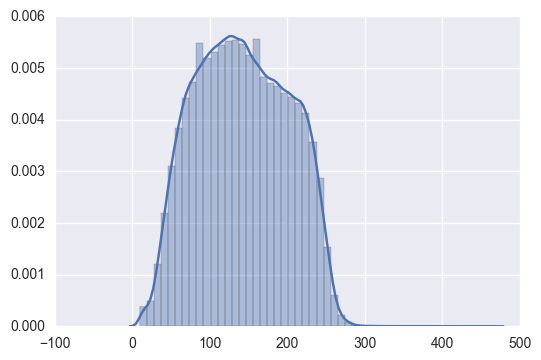

In [339]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(repeat_sizes_df, kde=True)

## Full MIR in enhancer

In [363]:
real_count = encode_bed.intersect(repeat_bed, F=1).count()
real_count

11183

In [356]:
repeat_bed.intersect(encode_bed, f=1).count()

11183

### Null Model 1: shuffled enhancers

In [374]:
def compare_null_model(counts, real_count):
    print("mean:", np.mean(counts), "std:", np.std(counts))
    import seaborn as sns
    %matplotlib inline
    import scipy.stats as st
    sns.distplot(counts, kde=False, fit=st.norm, bins=20)
    z_score =(real_count - np.mean(counts))/np.std(counts)
    p_values = st.norm.sf(abs(z_score))
    print("z-score:", z_score, "p-value:",p_values)

In [382]:
def build_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(bed_overlap_with, F=1)
    return core_null_model_intersection.count()

In [391]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 8103.37 std: 109.993695728
z-score: 27.9982409865 p-value: 8.53452816228e-173


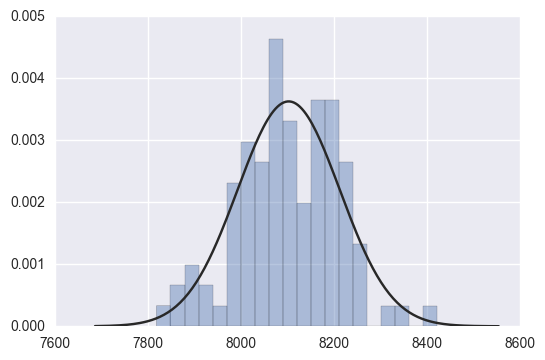

In [392]:
compare_null_model(counts, real_count)

### Null Model 2: shuffled repeats

In [396]:
def build_shuffled_full_overlap_with(bed, bed_overlap_with, assembly_path):
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [399]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 8107.45 std: 80.5198577992
z-score: 38.1961678034 p-value: 0.0


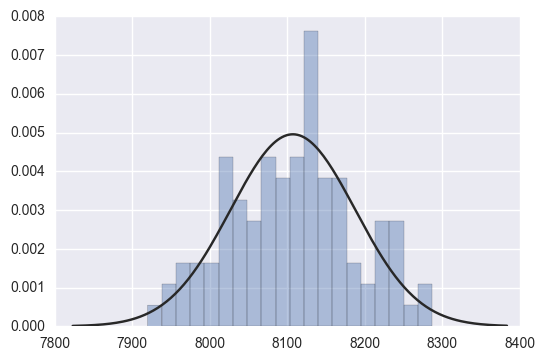

In [400]:
compare_null_model(counts, real_count)

### Null Model 3: shuffled on shuffled

In [402]:
def build_shuffled_on_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [403]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 8117.81 std: 89.2534251444
z-score: 34.3425475834 p-value: 9.09825068563e-259


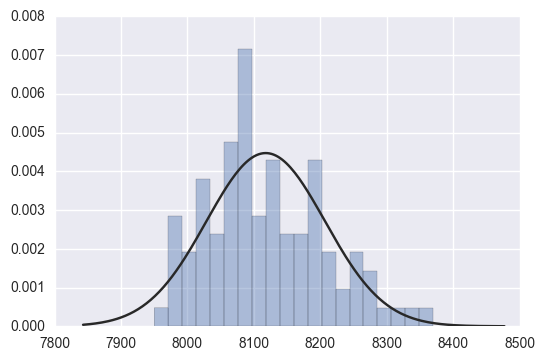

In [404]:
compare_null_model(counts, real_count)

## MIR-enhancers: core of enhancers in MIR

In [340]:
def compute_centers(df):
    df['centered_locus'] = round(
        (df['end'] - df['start'])/2 
        + df['start']).astype(int)

In [341]:
compute_centers(encode_bed_df)

In [342]:
encode_bed_cores_df = encode_bed_df.copy()
encode_bed_cores_df['start'] = encode_bed_cores_df['centered_locus']
encode_bed_cores_df['end'] = encode_bed_cores_df['centered_locus']

In [343]:
encode_bed_cores_df['chrom'].unique()

array(['chr7', 'chr2', 'chr19', 'chr6', 'chr10', 'chr18', 'chr1', 'chr11',
       'chr4', 'chr20', 'chr3', 'chrX', 'chr8', 'chr15', 'chr21', 'chr9',
       'chr16', 'chr22', 'chr5', 'chr13', 'chr17', 'chr14', 'chr12'], dtype=object)

In [344]:
encode_bed_cores = BedTool().from_dataframe(encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [345]:
encode_bed_cores.count()

33082

In [347]:
#MIR-enhancers: core of enhancer in MIR
core_intersection = encode_bed_cores.intersect(repeat_bed)

In [348]:
core_intersection.count()

975

In [209]:
core_intersection.head()

chr10	74081303	74081303	Distal-Prediction-5	1	.
 chr20	353506	353506	Distal-Prediction-15	1	.
 chr3	177076814	177076814	Distal-Prediction-24	1	.
 chr2	100908420	100908420	Distal-Prediction-29	1	.
 chr3	5471120	5471120	Distal-Prediction-55	1	.
 chr20	52239227	52239227	Distal-Prediction-177	1	.
 chr3	195854460	195854460	Distal-Prediction-251	1	.
 chr7	2059134	2059134	Distal-Prediction-272	1	.
 chr9	69013147	69013147	Distal-Prediction-304	1	.
 chr20	30294232	30294232	Distal-Prediction-341	1	.
 

In [313]:
counts = []
for i in range(0,20):
    shuffled_encode_bed = encode_bed.shuffle(g=assembly_path)
    shuffled_encode_bed_df = shuffled_encode_bed.to_dataframe()
    compute_centers(shuffled_encode_bed_df)
    shuffled_encode_bed_cores_df = shuffled_encode_bed_df.copy()
    shuffled_encode_bed_cores_df['start'] = shuffled_encode_bed_cores_df['centered_locus']
    shuffled_encode_bed_cores_df['end'] = shuffled_encode_bed_cores_df['centered_locus']
    shuffled_encode_bed_cores_all = BedTool().from_dataframe(shuffled_encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])
    core_null_model_intersection_all = shuffled_encode_bed_cores_all.intersect(repeat_bed)
    counts.append(core_null_model_intersection_all.count())

In [314]:
print(np.mean(counts), np.std(counts))

909.9 27.7360775886


In [315]:
z_score =(core_intersection.count() - np.mean(counts))/np.std(counts)
print(z_score)

2.34712351781


In [317]:
p_values = st.norm.sf(abs(z_score))
p_values

0.0094594909228034735

In [288]:
core_null_model_intersection_all = shuffled_encode_bed_cores_all.intersect(repeat_bed)
core_null_model_intersection_all.count()

885

In [234]:
# null model MIR-enhancers
shuffled_encode_bed_cores = encode_bed_cores.shuffle(g=assembly_path)
core_null_model_intersection = shuffled_encode_bed_cores.intersect(repeat_bed)

In [235]:
core_null_model_intersection.count()

897

In [329]:
def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num,
                                  g=assembly)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed.shuffle(g=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap_cores(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed.shuffle(g=assembly_path, chrom=False)
    random_bed_df = random_bed.to_dataframe()
    compute_centers(random_bed_df)
    random_bed_cores_df = random_bed_df.copy()
    random_bed_cores_df['start'] = random_bed_cores_df['centered_locus']
    random_bed_cores_df['end'] = random_bed_cores_df['centered_locus']
    random_bed_cores = BedTool().from_dataframe(random_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

    row_array = [idx, bed.intersect(random_bed_cores, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)



In [279]:
from joblib import Parallel, delayed
import multiprocessing

def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, 
                                                    samples_num,strategy='random', compute_cores=False):
    num_cores = multiprocessing.cpu_count()

    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']

    if strategy == 'shuffle':
        if compute_cores == True:
            df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap_cores)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
        else:
            df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                             (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    return pd.concat(df_list)

In [301]:
test_cores_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 50, 'random', compute_cores=False)

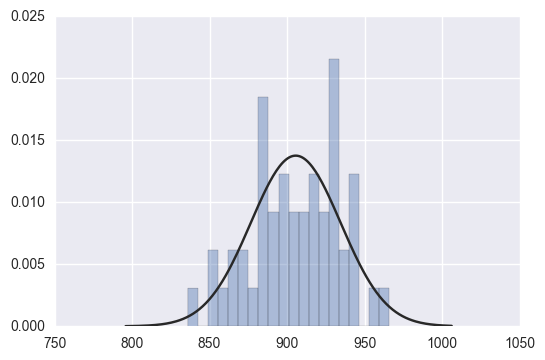

In [302]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_cores_df[['size']], kde=False, fit=st.norm, bins=20)

In [303]:
np.mean(test_cores_df['size'])

905.56

In [304]:
z_score =(core_intersection.count() - np.mean(test_cores_df['size']))/np.std(test_cores_df['size'])
print(z_score)

2.3952712487831964


In [305]:
p_values = st.norm.sf(abs(z_score))
p_values

0.0083040368879577896

In [153]:
test_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 1000, 'shuffle')

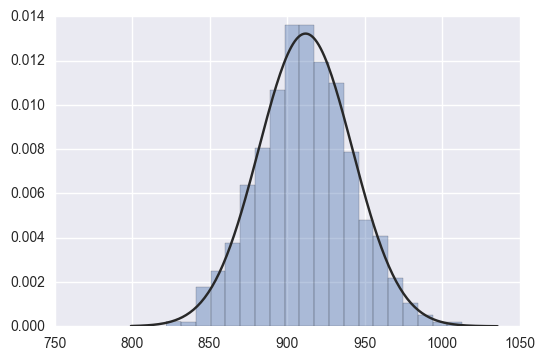

In [154]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df[['size']], kde=False, fit=st.norm, bins=20)

In [162]:
np.mean(test_df['size'])

911.917

In [163]:
np.std(test_df['size'])

30.180260287147945

In [295]:
z_score =(core_intersection.count() - np.mean(test_df['size']))/np.std(test_df['size'])
print(z_score)

2.0902072878033935


In [165]:
st.norm.ppf(0.975)

1.959963984540054

In [166]:
import scipy.stats as st
st.norm.ppf(.975)
st.norm.cdf(z_score)

0.98170040841630768

In [167]:
(1- st.norm.cdf(z_score))*100

1.8299591583692321

In [168]:
p_values = st.norm.sf(abs(z_score))
p_values

0.018299591583692331

In [169]:
st.ttest_1samp(a= test_df[['size']], popmean=core_intersection.count())

Ttest_1sampResult(statistic=array([-66.06510077]), pvalue=array([ 0.]))

In [170]:
st.ttest_1samp(a= test_df[['size']], popmean= np.mean(test_df[['size']]))

Ttest_1sampResult(statistic=size    0.0
dtype: float64, pvalue=array([ 1.]))

In [171]:
random_sizes = test_df[['size']]
random_sizes.reset_index(inplace=True, drop=True)

In [172]:
chi2, p = st.chisquare(random_sizes, core_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: [ 5015.70564103]
p-value: [ 0.]


In [173]:
encode_bed_cores.sort().fisher(repeat_bed.sort(), f=1e-09, g=assembly_path)

<FisherOutput at 4791661456>
# Number of query intervals: 33082
# Number of db intervals: 593161
# Number of overlaps: 975
# Number of possible intervals (estimated): 21123880
# phyper(975 - 1, 33082, 21123880 - 33082, 593161, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 975          | 32107        |
# not in -a | 592186       | 20498612     |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0.93864	0.065441	0.12548	1.051

In [174]:
1-st.hypergeom.cdf(975, 21123880 - 33082, 33082, 593161)

0.067519672328844149

In [150]:
df_reldist = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.sort()))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,642.000,682.000,721.000,750.000,742.000,695.000,685.000,718.000,694.000,676.00,...,641.000,602.000,650.00,606.000,655.00,632.000,652.00,660.00,578.000,3.0
fraction,0.019,0.021,0.022,0.023,0.022,0.021,0.021,0.022,0.021,0.02,...,0.019,0.018,0.02,0.018,0.02,0.019,0.02,0.02,0.017,0.0
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.09,...,0.410,0.420,0.43,0.440,0.45,0.460,0.47,0.48,0.490,0.5
total,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.00,...,33069.000,33069.000,33069.00,33069.000,33069.00,33069.000,33069.00,33069.00,33069.000,33069.0


In [326]:
df_reldist_random = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.shuffle(g=assembly_path, chrom=False).sort()))

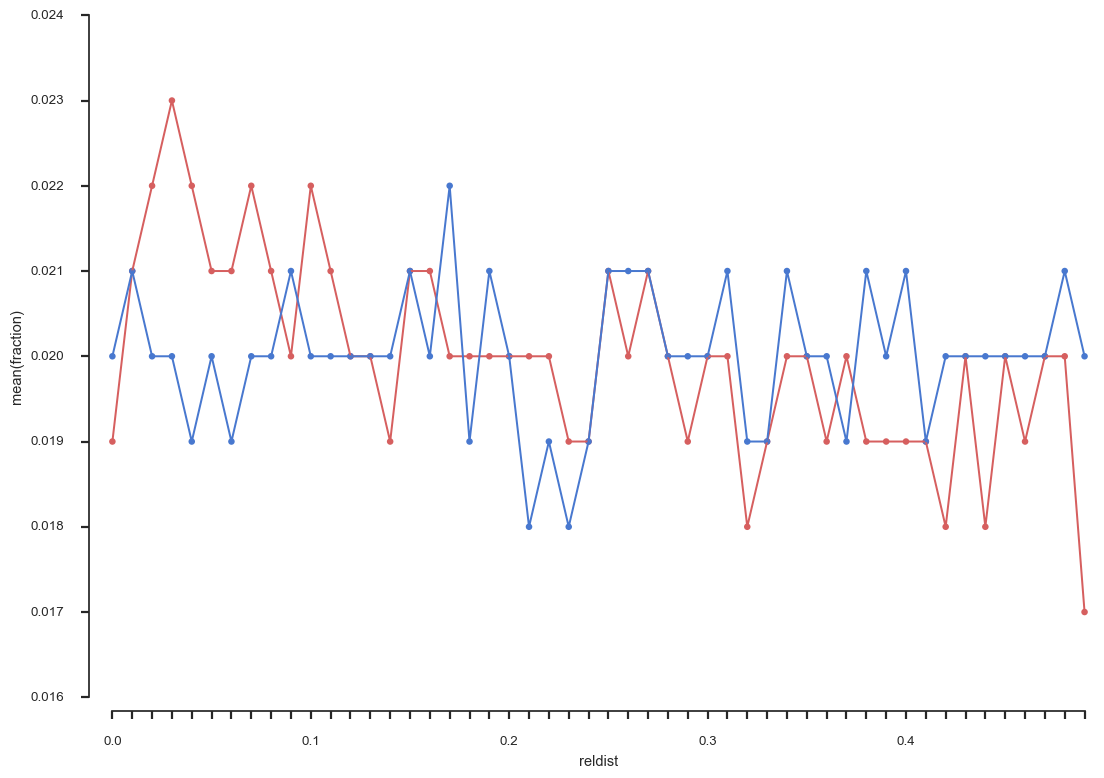

In [327]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Enhancer-MIRs: MIRs in a +/- 4 kbp window around enhancer's core 

In [328]:
encode_bed_df = encode_bed.to_dataframe()
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

In [329]:
encode_bed_df['size'].quantile(0.5) == encode_bed_df['size'].median()

True

In [330]:
encode_bed_df['size'].std()

1457.432952511683

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


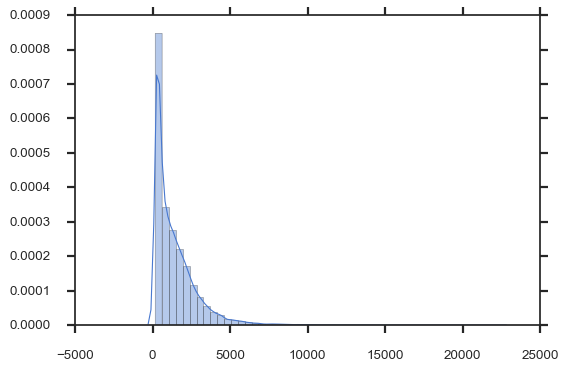

In [331]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(encode_bed_df[['size']], kde=True)

In [332]:
np.percentile(encode_bed_df[['size']], 50)

971.0

In [333]:
np.arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [334]:
encode_bed_df[['size']].quantile(np.arange(0,1,0.1))

,size
0.0,170.0
0.1,251.0
0.2,337.0
0.3,459.0
0.4,675.0
0.5,971.0
0.6,1313.0
0.7,1721.0
0.8,2229.0
0.9,3123.0


In [335]:
# what if using percentiles in considering enhancer regions? Eg: b=170/2, 251/2, ..., 3123/2
#encode_bed_slop = encode_bed_cores.slop(genome='hg19', b=int(round(3123/2)))

In [336]:
#compute "enhancers regions" as +/- 4kb from enhancer cores
encode_bed_slop = encode_bed_cores.slop(g=assembly_path, b=4000)

In [337]:
encode_bed_cores.sort().head()

chr1	118595	118595	Distal-Prediction-10810	1	.
 chr1	138794	138794	Proximal-Prediction-8451	1	.
 chr1	229554	229554	Proximal-Prediction-13463	1	.
 chr1	235802	235802	Proximal-Prediction-6494	1	.
 chr1	713934	713934	Proximal-Prediction-2259	1	.
 chr1	761154	761154	Proximal-Prediction-9261	1	.
 chr1	762601	762601	Proximal-Prediction-1564	1	.
 chr1	765589	765589	Proximal-Prediction-15111	1	.
 chr1	840032	840032	Proximal-Prediction-13579	1	.
 chr1	894288	894288	Proximal-Prediction-8969	1	.
 

In [338]:
encode_bed_slop.sort().head()

chr1	114595	122595	Distal-Prediction-10810	1	.
 chr1	134794	142794	Proximal-Prediction-8451	1	.
 chr1	225554	233554	Proximal-Prediction-13463	1	.
 chr1	231802	239802	Proximal-Prediction-6494	1	.
 chr1	709934	717934	Proximal-Prediction-2259	1	.
 chr1	757154	765154	Proximal-Prediction-9261	1	.
 chr1	758601	766601	Proximal-Prediction-1564	1	.
 chr1	761589	769589	Proximal-Prediction-15111	1	.
 chr1	836032	844032	Proximal-Prediction-13579	1	.
 chr1	890288	898288	Proximal-Prediction-8969	1	.
 

In [339]:
encode_bed_slop.count()

33082

In [340]:
#enhancer-MIRs: MIR in +/- 4kb from the core of an enhancer 
#(asking the full MIR to be overlapped by an enhancer region)
region_intersection = repeat_bed.intersect(encode_bed_slop, f=1)

In [341]:
region_intersection.count()

66741

In [342]:
# null model enhancers-MIRs
shuffled_repeat = repeat_bed.shuffle(g=assembly_path)

In [343]:
shuffled_repeat.count() == repeat_bed.count()

True

In [344]:
null_model_intersection = shuffled_repeat.intersect(encode_bed_slop, f=1)

In [345]:
null_model_intersection.count()

49997

In [346]:
test_df2 = create_random_overlap_distribution_parallelized(repeat_bed, encode_bed_slop, assembly_path,
                                                         1, 100)


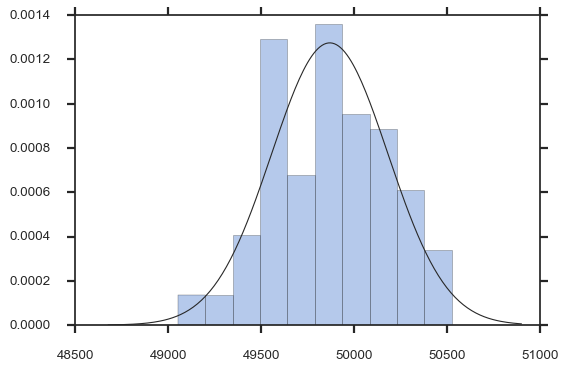

In [347]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df2[['size']], kde=False, fit=st.norm, bins=10)

In [348]:
z_score =(region_intersection.count() - np.mean(test_df2['size']))/np.std(test_df2['size'])
print(z_score)

53.90746785998093


In [349]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

1.0

In [350]:
p_values = st.norm.sf(abs(z_score))
p_values

0.0

In [351]:
st.ttest_1samp(a= test_df2[['size']], popmean= region_intersection.count())

Ttest_1sampResult(statistic=array([-536.37253287]), pvalue=array([  2.90040295e-173]))

In [352]:
chi2, p = st.chisquare( test_df2[['size']],region_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: [ 426664.7422424]
p-value: [ 0.]


In [354]:
repeat_bed.sort().fisher(encode_bed_slop.sort(), f=1, g=assembly_path)

<FisherOutput at 4756713368>
# Number of query intervals: 594372
# Number of db intervals: 33082
# Number of overlaps: 66741
# Number of possible intervals (estimated): 594372
# phyper(66741 - 1, 594372, 594372 - 594372, 33082, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 66741        | 527631       |
# not in -a | 0            | 0            |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	1	1	nan

In [355]:
#pvalue <- 1-phyper(45, 92, 7518, 1329)
#pvalue = 1-stats.hypergeom.cdf(45, 7518, 92. 1329)
1-st.hypergeom.cdf(66741, 0, 594732, 33082)

0.0

In [356]:
df_reldist = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort()))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,642.000,682.000,721.000,750.000,742.000,695.000,685.000,718.000,694.000,676.00,...,641.000,602.000,650.00,606.000,655.00,632.000,652.00,660.00,578.000,3.0
fraction,0.019,0.021,0.022,0.023,0.022,0.021,0.021,0.022,0.021,0.02,...,0.019,0.018,0.02,0.018,0.02,0.019,0.02,0.02,0.017,0.0
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.09,...,0.410,0.420,0.43,0.440,0.45,0.460,0.47,0.48,0.490,0.5
total,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.00,...,33069.000,33069.000,33069.00,33069.000,33069.00,33069.000,33069.00,33069.00,33069.000,33069.0


In [357]:
df_reldist_random = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort().shuffle(g=assembly_path, chrom=False).sort()))

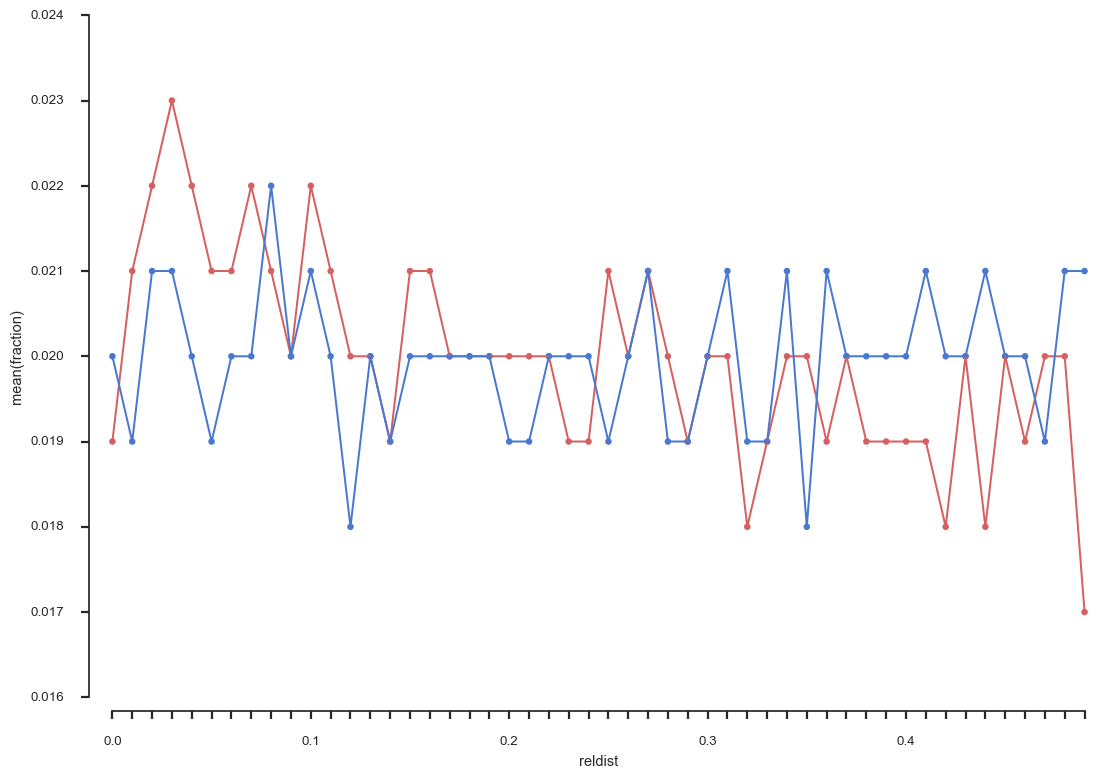

In [358]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Densities

In [483]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [403]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/MIR')

K562 enhancers density = 1.068651399908848e-05 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR K562 enhancers = 905


In [404]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [405]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [406]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [407]:
len(distal_df)

17249

In [408]:
len(proximal_df)

15833

In [409]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

Distal enhancers density = 5.571963000129291e-06 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR Distal enhancers = 472


In [410]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

Proximal enhancers density = 5.11455099895919e-06 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR Proximal enhancers = 433


In [411]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [412]:
genes_bed.count()

82960

In [413]:
genes_bed_df = genes_bed.to_dataframe()

In [414]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [415]:
genes_bed_df['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chrX', 'chrY', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21',
       'chr22'], dtype=object)

In [416]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [417]:
genes_bed.count()

78807

In [418]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/MIR')

Genes density = 2.5457109870206334e-05 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR Genes = 2157


In [439]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [440]:
genic_enhancers_bed.count()

15722

In [442]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [444]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

0

In [445]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [450]:
non_genic_enhancers_bed.count()

17360

In [451]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

True

In [452]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [453]:
enhancers_regions_bed.count()

33082

In [422]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [460]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

,size
0.0,19.0
0.1,993.6
0.2,4083.0
0.3,8054.0
0.4,13047.0
0.5,20134.0
0.6,30029.2
0.7,44468.0
0.8,71447.4
0.9,133227.0


In [502]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [478]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [479]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [480]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [481]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [491]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [504]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of MIR in genic enhancers", d1)
print("density of MIR in genic non enhancers", d2)
print("density of MIR in non genic enhancers", d3)
print("density of MIR in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)


density of MIR in genic enhancers 0.04617282022016232
density of MIR in genic non enhancers 0.011536760191622808
density of MIR in non genic enhancers 0.036260377708247304
density of MIR in enhancer regions 0.04256317634967656
Normalized Ratios 0.3381803281635356 0.08449787838264515 0.26557932511460774 0.3117424683392115
